## Comparison of CMIP6 and CMIP6plus GHG concentrations

Author: Vaishali Naik

Date: June 3, 2024

Read and plot global/NH/SH mean GHG concentrations 

In [1]:
#Load required python tools
from glob import glob
import xarray as xr
import pandas as pd
import copy 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import re

In [2]:
#Set directories
cmip6dir = "/archive/uda/input4MIPs/CMIP6/CMIP/UoM/UoM-CMIP-1-2-0/atmos/yr/"
cmip6pdir = "/net2/van/cmip6plus/ghg/input4MIPs/CMIP6Plus/CMIP/CR/CR-hist-ghg-concs-0.1.0/atmos/yr/"
plotdir = "/home/van/projs/cmip7/ghg/pngs/"

In [3]:
plotsec = 0 #global=0, NH=1, SH=2
region = 'Global'
figname = "gb.ghg_comparison.png"

In [4]:
plotlist = ['carbon-dioxide','methane','nitrous-oxide','cfc11','cfc12','cfc113','cfc114','ch3ccl3','hcfc22','hcfc141b','halon1301','methyl-bromide','methyl-chloride','carbon-tetrachloride','sf6']
years = np.arange(0.5, 2023.5,1)

In [5]:
#Get list of cmip6 and cmip6plus files from the respective directories
fcmip6 = [os.path.join(r,file) for r,d,f in os.walk(cmip6dir) for file in f]
fcmip6p = [os.path.join(r,file) for r,d,f in os.walk(cmip6pdir) for file in f]
# print(fcmip6p)

In [6]:
#Extract species names from file names
splist_cmip6 = []
for nm in fcmip6:
    fnames = nm.split('/')[10]
    # Using regular expression to extract the string between 'of-' and '-in-air'
    match = re.search(r'of-(.*?)-in-air', fnames)
    # Extracting the matched string
    if match:
        extracted_string = match.group(1)
        splist_cmip6.append(extracted_string)
    else:
        print("No match found")
splist_cmip6

['so2f2',
 'sf6',
 'nitrous-oxide',
 'nf3',
 'methyl-chloride',
 'methyl-bromide',
 'methane',
 'hfc4310mee',
 'hfc365mfc',
 'hfc32',
 'hfc245fa',
 'hfc236fa',
 'hfc23',
 'hfc227ea',
 'hfc152a',
 'hfc143a',
 'hfc134aeq',
 'hfc134a',
 'hfc125',
 'hcfc22',
 'hcfc142b',
 'hcfc141b',
 'halon2402',
 'halon1301',
 'halon1211',
 'chcl3',
 'ch3ccl3',
 'ch2cl2',
 'cfc12eq',
 'cfc12',
 'cfc11eq',
 'cfc115',
 'cfc114',
 'cfc113',
 'cfc11',
 'cf4',
 'carbon-tetrachloride',
 'carbon-dioxide',
 'c8f18',
 'c7f16',
 'c6f14',
 'c5f12',
 'c4f10',
 'c3f8',
 'c2f6',
 'c-c4f8']

In [7]:
#Extract species names from file names
splist_cmip6p = []
for nm in fcmip6p:
    fnames = nm.split('/')[12]
    # Using regular expression to extract the string between 'of-' and '-in-air'
    match = re.search(r'of-(.*?)-in-air', fnames)
    # Extracting the matched string
    if match:
        extracted_string = match.group(1)
        splist_cmip6p.append(extracted_string)
    else:
        print("No match found")
splist_cmip6p

['carbon-dioxide',
 'cfc113',
 'methane',
 'hcfc141b',
 'pfc7118',
 'hcc140a',
 'carbon-tetrachloride',
 'dichloromethane',
 'hcfc142b',
 'hfc143a',
 'hfc245fa',
 'sulfur-hexafluoride',
 'cfc12',
 'hfc23',
 'carbon-tetrafluoride',
 'cfc115',
 'pfc218',
 'pfc318',
 'hfc4310mee',
 'pfc6116',
 'hfc365mfc',
 'hfc152a',
 'cfc12-eq',
 'pfc4112',
 'hfc227ea',
 'nitrogen-trifluoride',
 'halon2402',
 'halon1301',
 'methyl-bromide',
 'hfc236fa',
 'pfc5114',
 'halon1211',
 'hcfc22',
 'cfc11-eq',
 'hfc134a-eq',
 'hfc134a',
 'chloroform',
 'cfc114',
 'sulfuryl-fluoride',
 'hfc125',
 'pfc116',
 'pfc3110',
 'nitrous-oxide',
 'methyl-chloride',
 'hfc32',
 'cfc11']

In [8]:
P6 = pd.DataFrame()
for item in plotlist:
    for i,sp in enumerate(splist_cmip6):
        if item == sp:
            infile = fcmip6[i]
            fx = infile.split('/')[10]
            fx=fx.replace('-', '_')
            d = xr.open_mfdataset(infile,decode_times=False)
            units = d[fx].attrs['units']  #ds.attrs.keys()
            x = d[fx].sel(sector=plotsec).drop('time')           
            df=x.to_dataframe(name=item)      
            dff=df.drop(['sector'],axis=1)            
            P6 = pd.concat([P6,dff],axis=1)            
P6.index.names = [None]
P6['mipera']='CMIP6'
P6=P6.reset_index().set_index(years[0:2015])
P6.index.name = 'Years'
P6 = P6.drop(columns=['index'])
P6

,carbon-dioxide,methane,nitrous-oxide,cfc11,cfc12,cfc113,cfc114,ch3ccl3,hcfc22,hcfc141b,halon1301,methyl-bromide,methyl-chloride,carbon-tetrachloride,sf6,mipera
Years,,,,,,,,,,,,,,,,
0.5,277.454010,644.990723,267.282837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5.299998,457.000000,0.025000,0.000000,CMIP6
1.5,277.136993,653.536011,267.282837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5.299998,457.000000,0.025000,0.000000,CMIP6
2.5,277.160004,653.599121,267.282837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5.299998,457.000000,0.025000,0.000000,CMIP6
3.5,277.157990,653.634033,267.282837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5.299998,457.000000,0.025000,0.000000,CMIP6
4.5,277.157013,653.679016,267.282837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5.299998,457.000000,0.025000,0.000000,CMIP6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010.5,388.717041,1807.850708,323.140991,240.451813,531.281982,75.339035,16.415091,7.662666,207.745544,20.679499,3.19607,7.125164,535.310242,87.380959,7.010203,CMIP6
2011.5,390.944000,1813.070190,324.158966,238.245819,528.532959,74.638237,16.361385,6.305954,214.559372,21.561199,3.23096,7.106488,534.165588,86.058784,7.307322,CMIP6
2012.5,393.015991,1815.261230,325.005005,236.206833,525.833984,73.978630,16.340286,5.245331,220.108414,22.543598,3.25254,6.987857,537.653809,85.014244,7.598474,CMIP6


In [9]:
P = pd.DataFrame()
units = []
for item in plotlist:
    if item == "sf6":
        item ="sulfur-hexafluoride"
    elif item== "ch3ccl3":
        item = "hcc140a"
    for i,sp in enumerate(splist_cmip6p):
        if item == sp:
            infile = fcmip6p[i]
            fx = infile.split('/')[12]
            fx=fx.replace('-', '_')
            ds = xr.open_mfdataset(infile,decode_times=False)         
            xs = ds[fx].sel(sector=plotsec).drop('time') 
            unit = ds[fx].attrs['units']  #ds.attrs.keys()
            units.append(unit)
            if item=='sulfur-hexafluoride':
                dfs=xs.to_dataframe(name='sf6')
            elif item=='hcc140a':
                dfs=xs.to_dataframe(name='ch3ccl3')
            else:
                dfs=xs.to_dataframe(name=item)
            dffs=dfs.drop(['sector'],axis=1)            
            P = pd.concat([P,dffs],axis=1)            
P.index.names = [None]
P['mipera']='CMIP6Plus'
P=P.reset_index().set_index(years[1:2023])
P.index.name = 'Years'
P = P.drop(columns=['index'])
P

,carbon-dioxide,methane,nitrous-oxide,cfc11,cfc12,cfc113,cfc114,ch3ccl3,hcfc22,hcfc141b,halon1301,methyl-bromide,methyl-chloride,carbon-tetrachloride,sf6,mipera
Years,,,,,,,,,,,,,,,,
1.5,277.099028,639.479732,266.635510,0.000000,0.000000,0.000000,0.000000,-7.679043e-16,0.000000,-1.154632e-13,0.000000,5.500000,460.000000,-3.315910e-13,-1.213844e-14,CMIP6Plus
2.5,277.099028,639.527388,266.635510,0.000000,0.000000,0.000000,0.000000,-1.128727e-15,0.000000,-7.700507e-13,0.000000,5.500000,460.000000,-2.286768e-12,-1.376677e-14,CMIP6Plus
3.5,277.099028,639.575045,266.635510,0.000000,0.000000,0.000000,0.000000,-1.554312e-15,0.000000,-5.776120e-13,0.000000,5.500000,460.000000,-1.706491e-12,-2.442491e-14,CMIP6Plus
4.5,277.099028,639.622701,266.635510,0.000000,0.000000,0.000000,0.000000,-1.517305e-15,0.000000,-8.079463e-13,0.000000,5.500000,460.000000,-2.414665e-12,-1.583918e-14,CMIP6Plus
5.5,277.099028,639.670357,266.635510,0.000000,0.000000,0.000000,0.000000,2.775558e-17,0.000000,2.960595e-15,0.000000,5.500000,460.000000,-5.925607e-15,2.072416e-15,CMIP6Plus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018.5,407.762540,1869.547400,330.997576,228.141467,507.062437,70.338835,16.269543,1.926930e+00,246.340497,2.463867e+01,3.347220,6.656207,537.766288,7.865645e+01,9.613939e+00,CMIP6Plus
2019.5,410.367633,1877.263781,331.913873,226.537055,502.794875,69.705361,16.296545,1.658751e+00,248.828882,2.473640e+01,3.348567,6.549693,534.115093,7.781229e+01,9.957837e+00,CMIP6Plus
2020.5,412.873065,1889.675509,333.086557,224.046330,498.663597,69.100549,16.288235,1.443336e+00,250.212320,2.482941e+01,3.345346,6.625070,541.174213,7.667641e+01,1.028132e+01,CMIP6Plus


In [10]:
xplot = pd.concat([P6,P],axis=0) 
xplot_melted = xplot.reset_index().melt(id_vars=['Years','mipera'], value_vars=plotlist, var_name='ghg', value_name='concentration')
xplot

,carbon-dioxide,methane,nitrous-oxide,cfc11,cfc12,cfc113,cfc114,ch3ccl3,hcfc22,hcfc141b,halon1301,methyl-bromide,methyl-chloride,carbon-tetrachloride,sf6,mipera
Years,,,,,,,,,,,,,,,,
0.5,277.454010,644.990723,267.282837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.299998,457.000000,0.025000,0.000000,CMIP6
1.5,277.136993,653.536011,267.282837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.299998,457.000000,0.025000,0.000000,CMIP6
2.5,277.160004,653.599121,267.282837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.299998,457.000000,0.025000,0.000000,CMIP6
3.5,277.157990,653.634033,267.282837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.299998,457.000000,0.025000,0.000000,CMIP6
4.5,277.157013,653.679016,267.282837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.299998,457.000000,0.025000,0.000000,CMIP6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018.5,407.762540,1869.547400,330.997576,228.141467,507.062437,70.338835,16.269543,1.926930,246.340497,24.638670,3.347220,6.656207,537.766288,78.656453,9.613939,CMIP6Plus
2019.5,410.367633,1877.263781,331.913873,226.537055,502.794875,69.705361,16.296545,1.658751,248.828882,24.736396,3.348567,6.549693,534.115093,77.812288,9.957837,CMIP6Plus
2020.5,412.873065,1889.675509,333.086557,224.046330,498.663597,69.100549,16.288235,1.443336,250.212320,24.829413,3.345346,6.625070,541.174213,76.676414,10.281321,CMIP6Plus


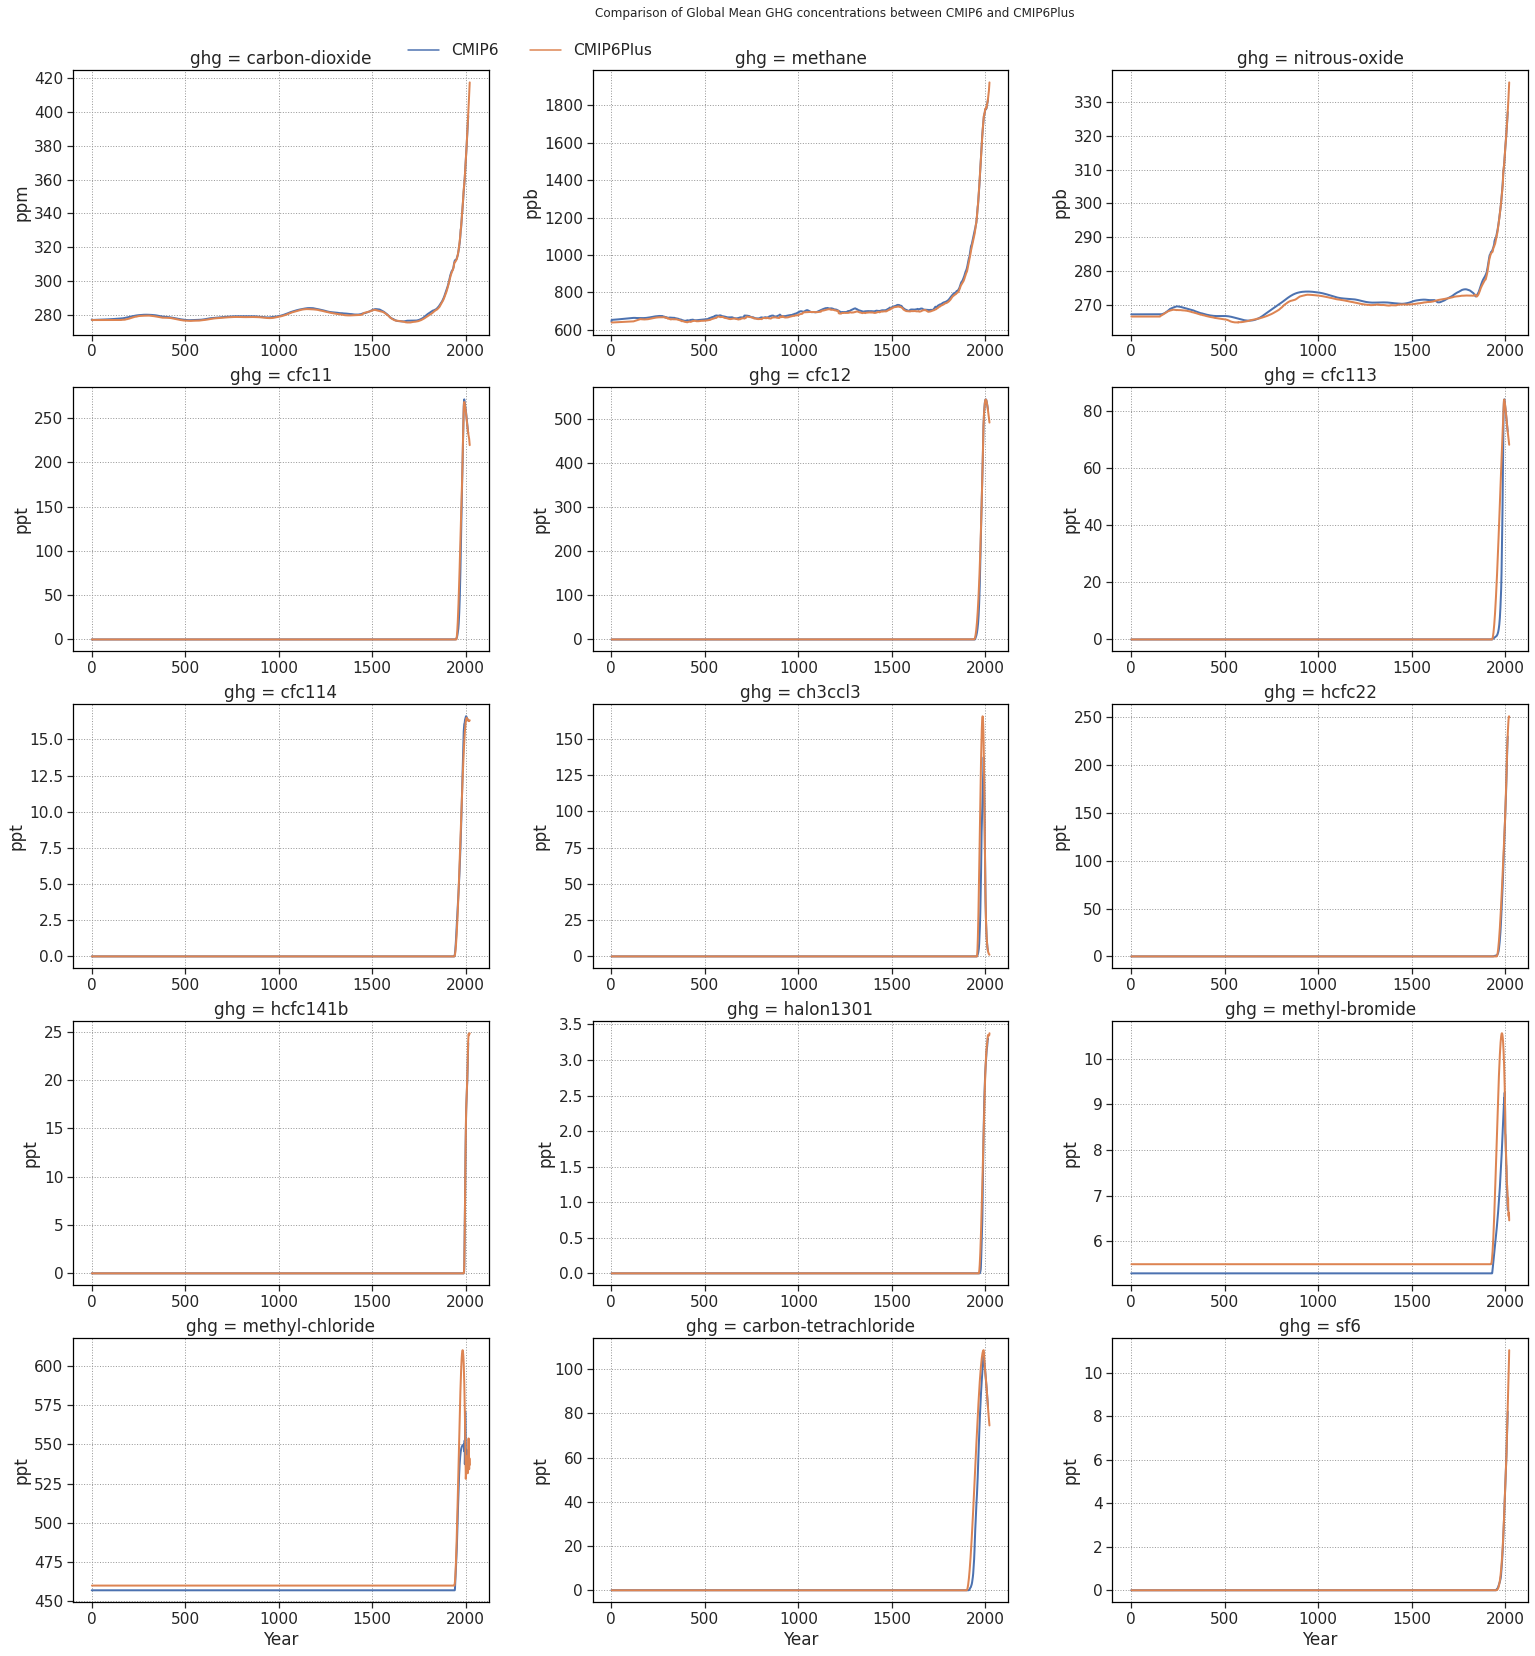

In [11]:
sns.set_style("ticks")
sns.set_context("paper", font_scale = 1.9, rc={"grid.linewidth": 2})
custom_params = {"axes.grid": True,'axes.edgecolor': 'black',"grid.color": ".6", "grid.linestyle": ":"}
sns.set_theme(font_scale= 1.4, rc=custom_params)

g = sns.relplot(data=xplot_melted, x='Years', y='concentration', col='ghg', hue="mipera", 
                kind="line",linewidth=2,col_wrap=3,height=4.5, aspect=1.6, facet_kws={'sharey': False,'sharex':False,'despine':False})
# g.set_titles('')
g.set_axis_labels("Year","")

for i, ax in enumerate(g.axes.flatten()):
    ax.set_ylabel(units[i])
    ax.set_facecolor('white')
    ax.tick_params(bottom=True, left=True)
    # ax.text(0.0, 1.02,splist_cmip6[i], fontsize=16, transform=ax.transAxes) #add text

    sns.move_legend(g, "lower right",
    bbox_to_anchor=(.4, 0.98), ncol=2, title=None, frameon=False)
g.fig.subplots_adjust(wspace=0.25,hspace=0.2)
plt.suptitle('Comparison of '+region+' Mean GHG concentrations between CMIP6 and CMIP6Plus', y=1.02)
plt.savefig(plotdir+figname)

In [12]:
# https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory